### Contents
#### 1. Importing libraries and data
#### 2. Data Wrangling
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing
#### 6. Autocorrelations

### 1. Importing libraries and data

In [96]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [97]:
path = r'C:\Documents\Career Foundry\Immersion Final\Prison Comparisons\02 Data\Prepped Data'

In [141]:
df = pd.read_csv(os.path.join(path, 'carc15clean.csv'), index_col = 0)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
pd.options.display.max_rows = None

In [142]:
df.head(50)

,year,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,white_pop_15to64,urbanicity,region,division
0,1970,AL,Autauga County,24661,14154,7293,6861,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
1,1971,AL,Autauga County,25503,14765,7585,7180,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
2,1972,AL,Autauga County,27156,15939,8168,7771,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
3,1973,AL,Autauga County,28453,16906,8651,8255,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
4,1974,AL,Autauga County,29261,17578,8992,8586,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
5,1975,AL,Autauga County,29716,18007,9210,8797,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
6,1976,AL,Autauga County,29892,18476,9447,9029,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
7,1977,AL,Autauga County,30457,19068,9757,9311,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
8,1978,AL,Autauga County,30879,19566,10013,9553,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
9,1979,AL,Autauga County,32050,20523,10505,10018,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central


### 2. Data Wrangling

##### Create new dataframe with just year and total_pop

In [155]:
dfs = df.drop(['state', 'county_name'], axis=1)

In [156]:
dfs.head()

,year,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,white_pop_15to64,urbanicity,region,division
0,1970,24661,14154,7293,6861,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
1,1971,25503,14765,7585,7180,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
2,1972,27156,15939,8168,7771,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
3,1973,28453,16906,8651,8255,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central
4,1974,29261,17578,8992,8586,513.230571,11737.336078,1132.145651,261.600618,31199.733917,small/mid,South,East South Central


In [227]:
dfc = dfs.loc[:, 'year':'total_pop']

In [228]:
dfc.head()

,year,total_pop
0,1970,24661
1,1971,25503
2,1972,27156
3,1973,28453
4,1974,29261


##### Group total_pop by year so only have 1 instance each of year 

In [229]:
dfcg = dfc2.groupby('year')['total_pop'].mean().reset_index()

In [230]:
dfcg.head()

,year,total_pop
0,1970,64951.342147
1,1971,65851.710417
2,1972,66633.946798
3,1973,67294.424658
4,1974,67925.565467


##### Set the year column as the index

In [210]:
from datetime import datetime

In [231]:
# Create a datetime column from "year"

dfcg['datetime'] = pd.to_datetime(dfcg['year'], format="%Y")

In [232]:
dfcg.head()

,year,total_pop,datetime
0,1970,64951.342147,1970-01-01
1,1971,65851.710417,1971-01-01
2,1972,66633.946798,1972-01-01
3,1973,67294.424658,1973-01-01
4,1974,67925.565467,1974-01-01


In [213]:
#dfcg['yr'] = dfcg['yr'].dt.year

In [233]:
dfcg.head()

,year,total_pop,datetime
0,1970,64951.342147,1970-01-01
1,1971,65851.710417,1971-01-01
2,1972,66633.946798,1972-01-01
3,1973,67294.424658,1973-01-01
4,1974,67925.565467,1974-01-01


In [234]:
# Set the datetime as the index of the dataframe

dfcg = dfcg.set_index('datetime')

In [235]:
dfcg.head(100)

,year,total_pop
datetime,,
1970-01-01,1970,64951.342147
1971-01-01,1971,65851.710417
1972-01-01,1972,66633.946798
1973-01-01,1973,67294.424658
1974-01-01,1974,67925.565467
1975-01-01,1975,68600.144951
1976-01-01,1976,69266.991399
1977-01-01,1977,69966.691622
1978-01-01,1978,70709.801211


In [236]:
# Drop the "year" column

dfcg.drop(['year'], axis=1, inplace=True) 

In [237]:
dfcg.head()

,total_pop
datetime,
1970-01-01,64951.342147
1971-01-01,65851.710417
1972-01-01,66633.946798
1973-01-01,67294.424658
1974-01-01,67925.565467


In [238]:
dfcg.shape

(49, 1)

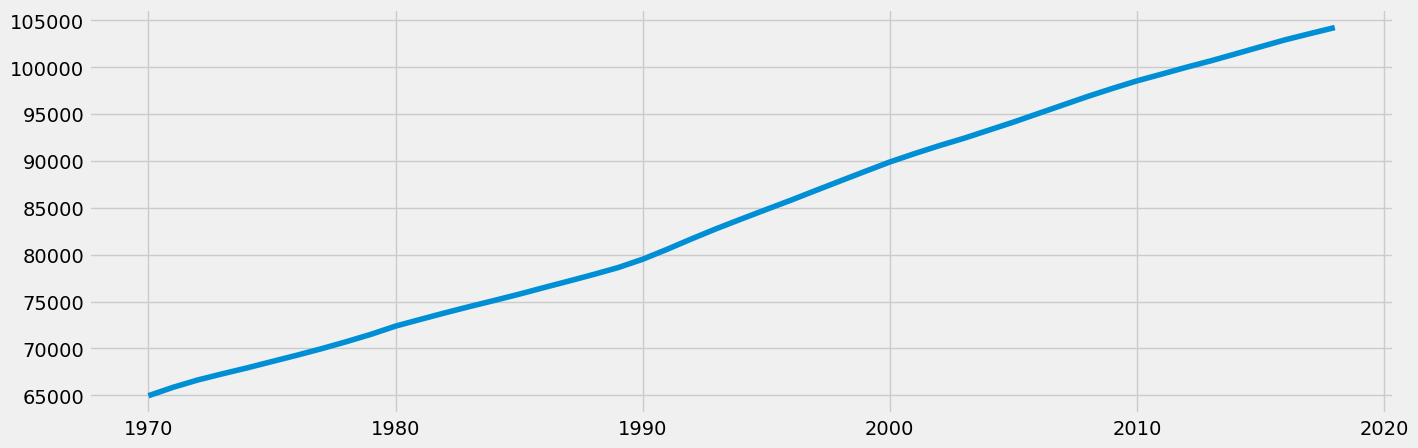

In [239]:
# Plot cleaned data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dfcg)

 Data trends pretty consistenly upwards with a slight drop in the late '80s

In [240]:
# Check for missing values

dfcg.isnull().sum() 

total_pop    0
dtype: int64

In [241]:
# Check for duplicates

dups = dfcg.duplicated()
dups.sum()

# No dups

0

### 3. Time-series analysis: decomposition

In [242]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(dfcg, model='additive')

In [245]:
# This will define a fixed size for all special charts

from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

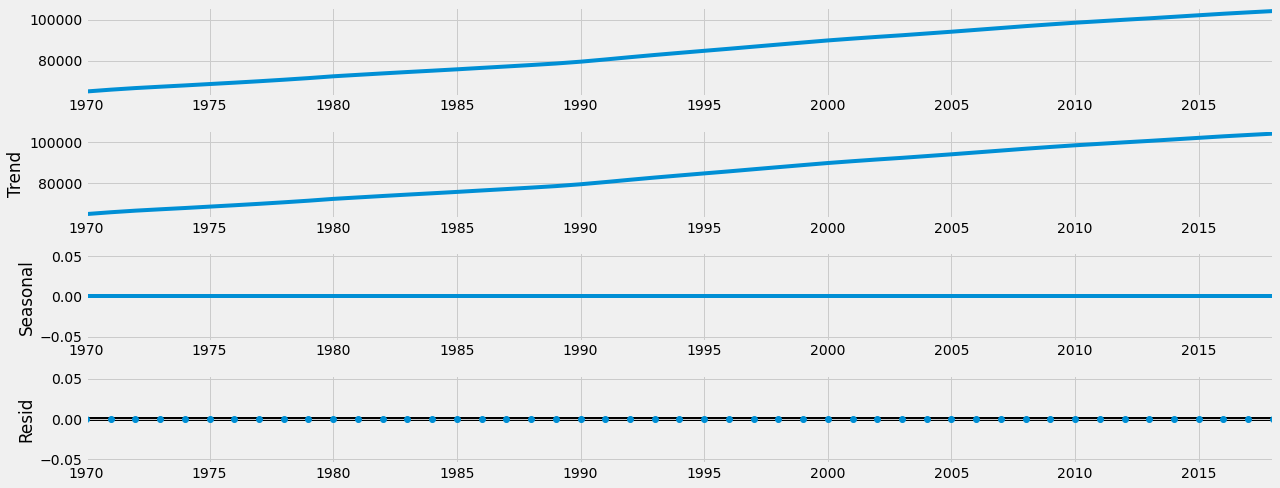

In [246]:
# Plot the separate components

decomposition.plot()
plt.show()

No seasonality because the data is by year.  Low noise because the data has been smoothed by averaging.

### 4. Testing for stationarity

In [247]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(dfcg['total_pop'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.927050
p-value                         0.778934
Number of Lags Used             4.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


Null hypothesis is that there isn't a unit root.  Can't disprove it because the test statistic is larger than the Critical Value 5%. So there is a trend in the data.

### 5. Stationarizing 

In [250]:
# The df.shift(1) function turns the observation to t-1, 
# making the whole thing t - (t -1)

data_diff = dfcg - dfcg.shift(1) 

In [251]:
# Remove the missing values that came about as a result of the differencing. 
# Need to remove these to run the Dickey-Fuller test again

data_diff.dropna(inplace = True)

In [252]:
data_diff.head()

,total_pop
datetime,
1971-01-01,900.368270
1972-01-01,782.236381
1973-01-01,660.477859
1974-01-01,631.140809
1975-01-01,674.579484


In [254]:
data_diff.isnull().sum()

total_pop    0
dtype: int64

In [255]:
data_diff.columns

Index(['total_pop'], dtype='object')

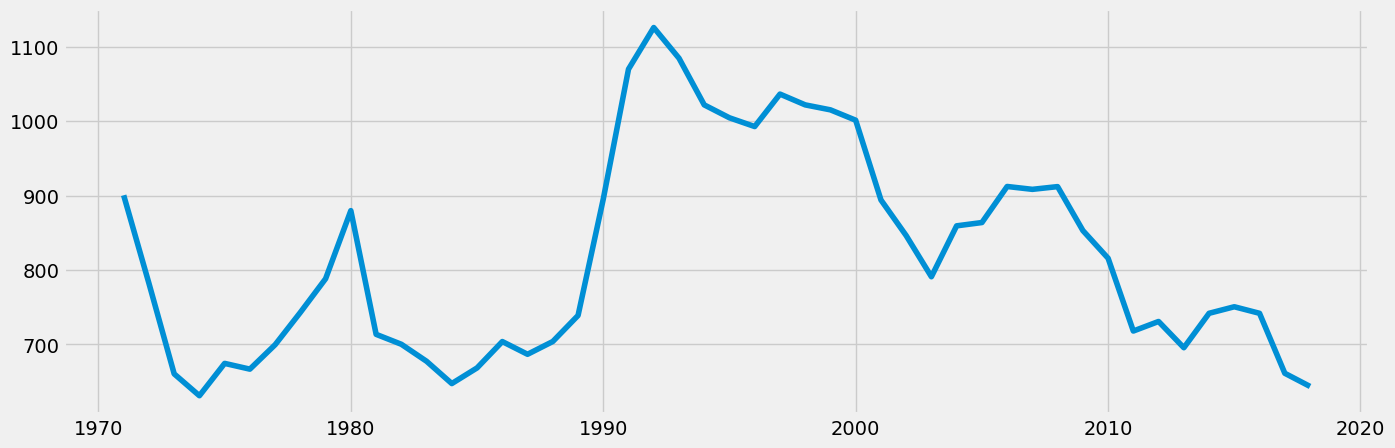

In [256]:
# Plot after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [259]:
# Apply the test using the function on the time series
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.586065
p-value                         0.490589
Number of Lags Used             3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


Test statistic is still larger than critical value 5%

In [260]:
data_diff2 = data_diff - data_diff.shift(1) 

In [261]:
data_diff2.dropna(inplace = True)

In [262]:
data_diff2.head()

,total_pop
datetime,
1972-01-01,-118.131889
1973-01-01,-121.758522
1974-01-01,-29.337050
1975-01-01,43.438675
1976-01-01,-7.733036


In [263]:
data_diff2.columns

Index(['total_pop'], dtype='object')

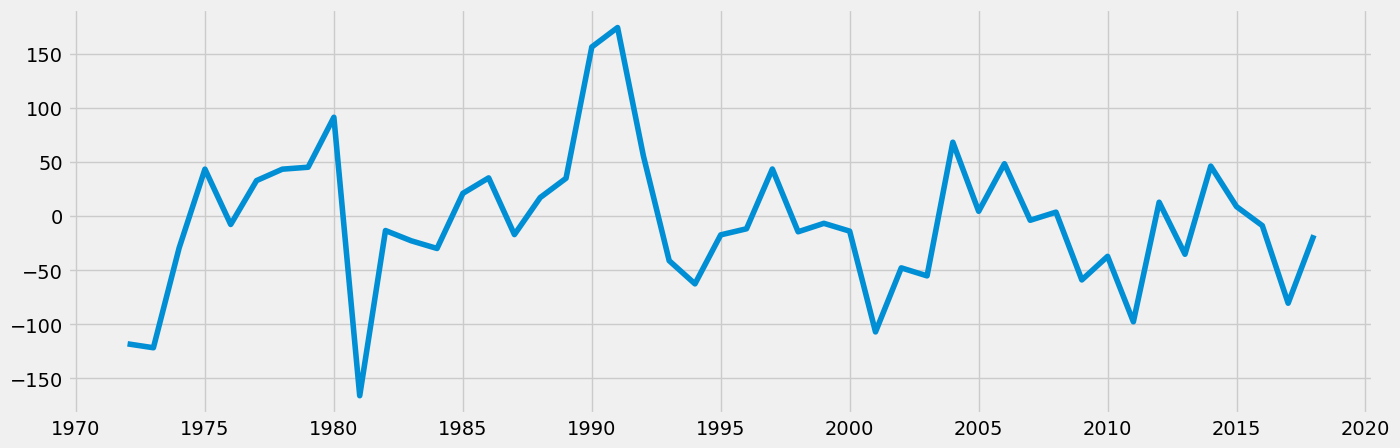

In [264]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [265]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.462642
p-value                         0.000230
Number of Lags Used             2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


Test statistic is now smaller than critical value 5% so data is stationary.

### 6. Autocorrelations

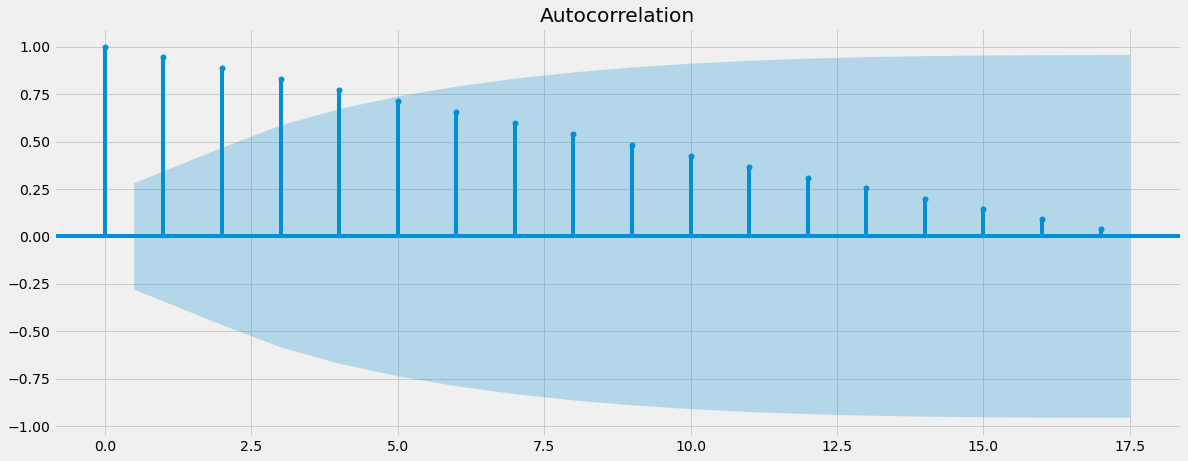

In [248]:
# Plot of autocorrelations with original data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(dfcg)
plt.show()

Lines go above blue shape, original data is non-stationary

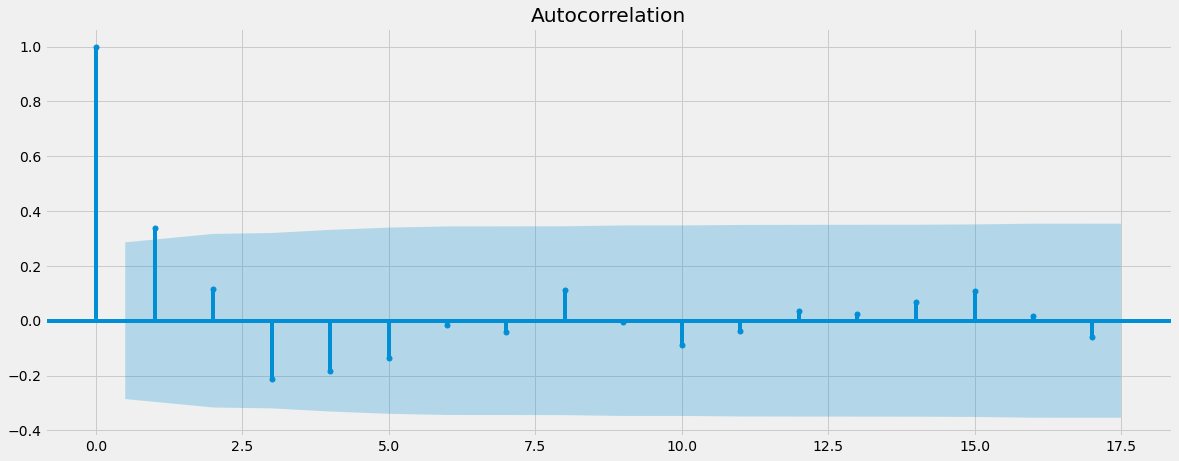

In [267]:
# Plot of autocorrelations differenced data

plot_acf(data_diff2)
plt.show()

Less than 10 significant lags which confirms data is stationary